In [1]:
import numpy as np
import matplotlib.pylab as plt
import calculate_cleavage_rate_sd as clv
import preprocessing
reload(clv)
reload(preprocessing)

<module 'preprocessing' from 'preprocessing.pyc'>

In [4]:
parameters = np.zeros(32)
model_id = 'seq_dep_finetuning_direct_pairs_free_ei'
xdata,ydata,yerr = preprocessing.prepare_multiprocessing_seq_dep_wa('WT_cleavage_rate_and_y0_Canonical_OT-r_1-1.csv','../../data_nucleaseq_Finkelsteinlab/targetE/')

print np.log10(clv.calc_clv_rate_fast(parameters,model_id,xdata[22]))

-0.8291423061011487


A: orange, T: blue, G: red, C: green


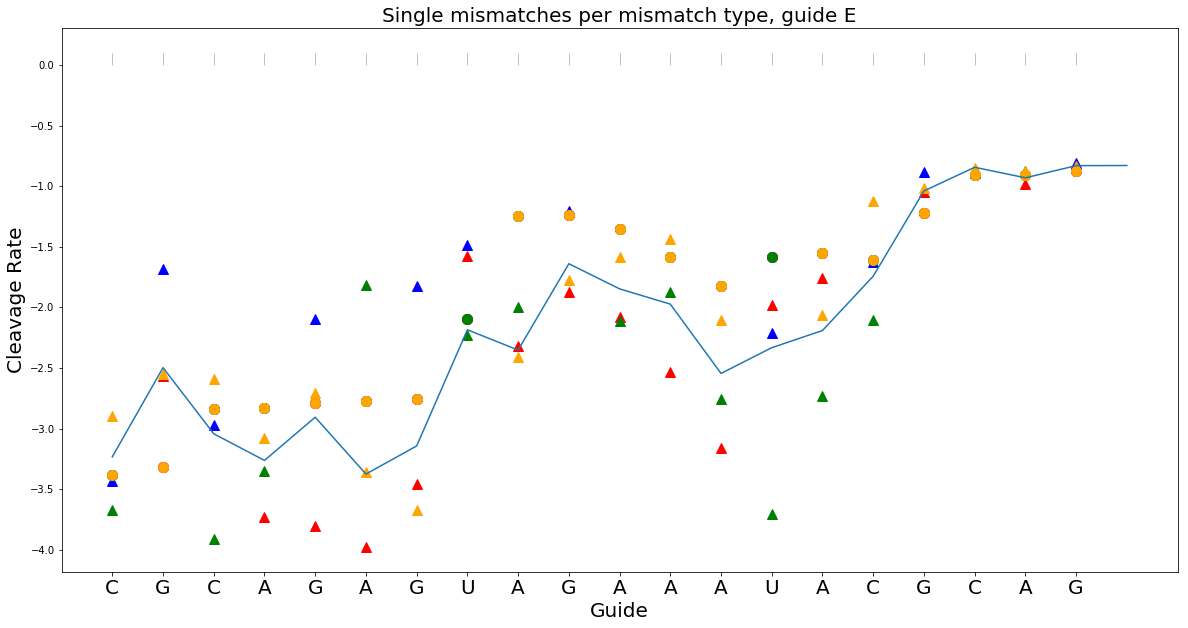

In [5]:
plt.figure(figsize=[20,10])

parameters = np.ones(32)
parameters[-20:] *= 5


guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
labelE = []
for i in range(20):
    labelE.append(guide_sequenceE[i])


for j in range(len(xdata)):
    if len(xdata[j][2])>0:
        if xdata[j][0][xdata[j][2][0]-1]=='A':
            color = 'blue'
        elif xdata[j][0][xdata[j][2][0]-1]=='T':
            color = 'orange'
        elif xdata[j][0][xdata[j][2][0]-1]=='C':
            color = 'red'
        elif xdata[j][0][xdata[j][2][0]-1]=='G':
            color = 'green'
        
        clv_temp = np.log10(clv.calc_clv_rate_fast(parameters,model_id,xdata[j]))
        plt.plot(xdata[j][2][0],clv_temp,color=color,marker='o',markersize=10.)
        plt.plot(xdata[j][2][0],ydata[j][0],color=color,marker='^',markersize=10.)
        
model_pred = [-3.23320887, -2.49715444, -3.04304113, -3.26276305, -2.90649393, -3.37527882,
                 -3.14329681, -2.18467131, -2.35215769, -1.63962913, -1.8469779,  -1.9731426,
                 -2.54474827, -2.3326522,  -2.19072379, -1.74259479, -1.03922173, -0.84372966,
                 -0.93060421, -0.83024852, -0.82914231]

plt.plot(range(1,22),model_pred)

plt.vlines(range(1,21),10**-4,10**-1,color='grey',linewidth=.5);
plt.xticks(range(1,21),labelE,fontsize=20);
plt.xlabel('Guide',fontsize=20)
plt.ylabel('Cleavage Rate',fontsize=20)
plt.title('Single mismatches per mismatch type, guide E',fontsize=20)

print 'A: orange, T: blue, G: red, C: green'